![for sale image, from https://time.com/5835778/selling-home-coronavirus/](https://api.time.com/wp-content/uploads/2020/05/selling-home-coronavirus.jpg?w=800&quality=85)

# Project Title

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

Questions to consider:

- Who are your stakeholders?
- What are your stakeholders' pain points related to this project?
- Why are your predictions important from a business perspective?

### Stakeholders: small real estate company who advises families on selling their homes
### Pain points: 

## Data Understanding

Describe the data being used for this project.

Questions to consider:

- Where did the data come from, and how do they relate to the data analysis questions?
- What do the data represent? Who is in the sample and what variables are included?
- What is the target variable?
- What are the properties of the variables you intend to use?

In [1]:
# import relevant libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
data = pd.read_csv('../../data/kc_house_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [4]:
# I'm focusing on specific house features
rel_cols = ['price','sqft_living','sqft_lot','sqft_above','sqft_basement',
            'floors','bedrooms','bathrooms','sqft_living15','sqft_lot15']

In [39]:
datan = data[rel_cols]
datan

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,floors,bedrooms,bathrooms,sqft_living15,sqft_lot15
0,221900.0,1180,5650,1180,0.0,1.0,3,1.00,1340,5650
1,538000.0,2570,7242,2170,400.0,2.0,3,2.25,1690,7639
2,180000.0,770,10000,770,0.0,1.0,2,1.00,2720,8062
3,604000.0,1960,5000,1050,910.0,1.0,4,3.00,1360,5000
4,510000.0,1680,8080,1680,0.0,1.0,3,2.00,1800,7503
...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,1530,1131,1530,0.0,3.0,3,2.50,1530,1509
21593,400000.0,2310,5813,2310,0.0,2.0,4,2.50,1830,7200
21594,402101.0,1020,1350,1020,0.0,2.0,2,0.75,1020,2007
21595,400000.0,1600,2388,1600,0.0,2.0,3,2.50,1410,1287


In [40]:
datan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   sqft_living    21597 non-null  int64  
 2   sqft_lot       21597 non-null  int64  
 3   sqft_above     21597 non-null  int64  
 4   sqft_basement  21597 non-null  object 
 5   floors         21597 non-null  float64
 6   bedrooms       21597 non-null  int64  
 7   bathrooms      21597 non-null  float64
 8   sqft_living15  21597 non-null  int64  
 9   sqft_lot15     21597 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 1.6+ MB


In [41]:
datan['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2500.0        1
1548.0        1
1960.0        1
704.0         1
666.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [42]:
datan.loc[datan['sqft_basement'] == '?','sqft_basement'] = np.nan

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [43]:
datan['sqft_basement'].value_counts()

0.0       12826
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
518.0         1
274.0         1
65.0          1
3500.0        1
666.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [47]:
def tryfloat(x):
    try:
        return float(x)
    except:
        return x

In [48]:
datan['sqft_basement'] = datan['sqft_basement'].map(tryfloat)

<ipython-input-48-e3af73b1d868>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datan['sqft_basement'] = datan['sqft_basement'].map(tryfloat)


In [49]:
datan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   sqft_living    21597 non-null  int64  
 2   sqft_lot       21597 non-null  int64  
 3   sqft_above     21597 non-null  int64  
 4   sqft_basement  21143 non-null  float64
 5   floors         21597 non-null  float64
 6   bedrooms       21597 non-null  int64  
 7   bathrooms      21597 non-null  float64
 8   sqft_living15  21597 non-null  int64  
 9   sqft_lot15     21597 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.6 MB


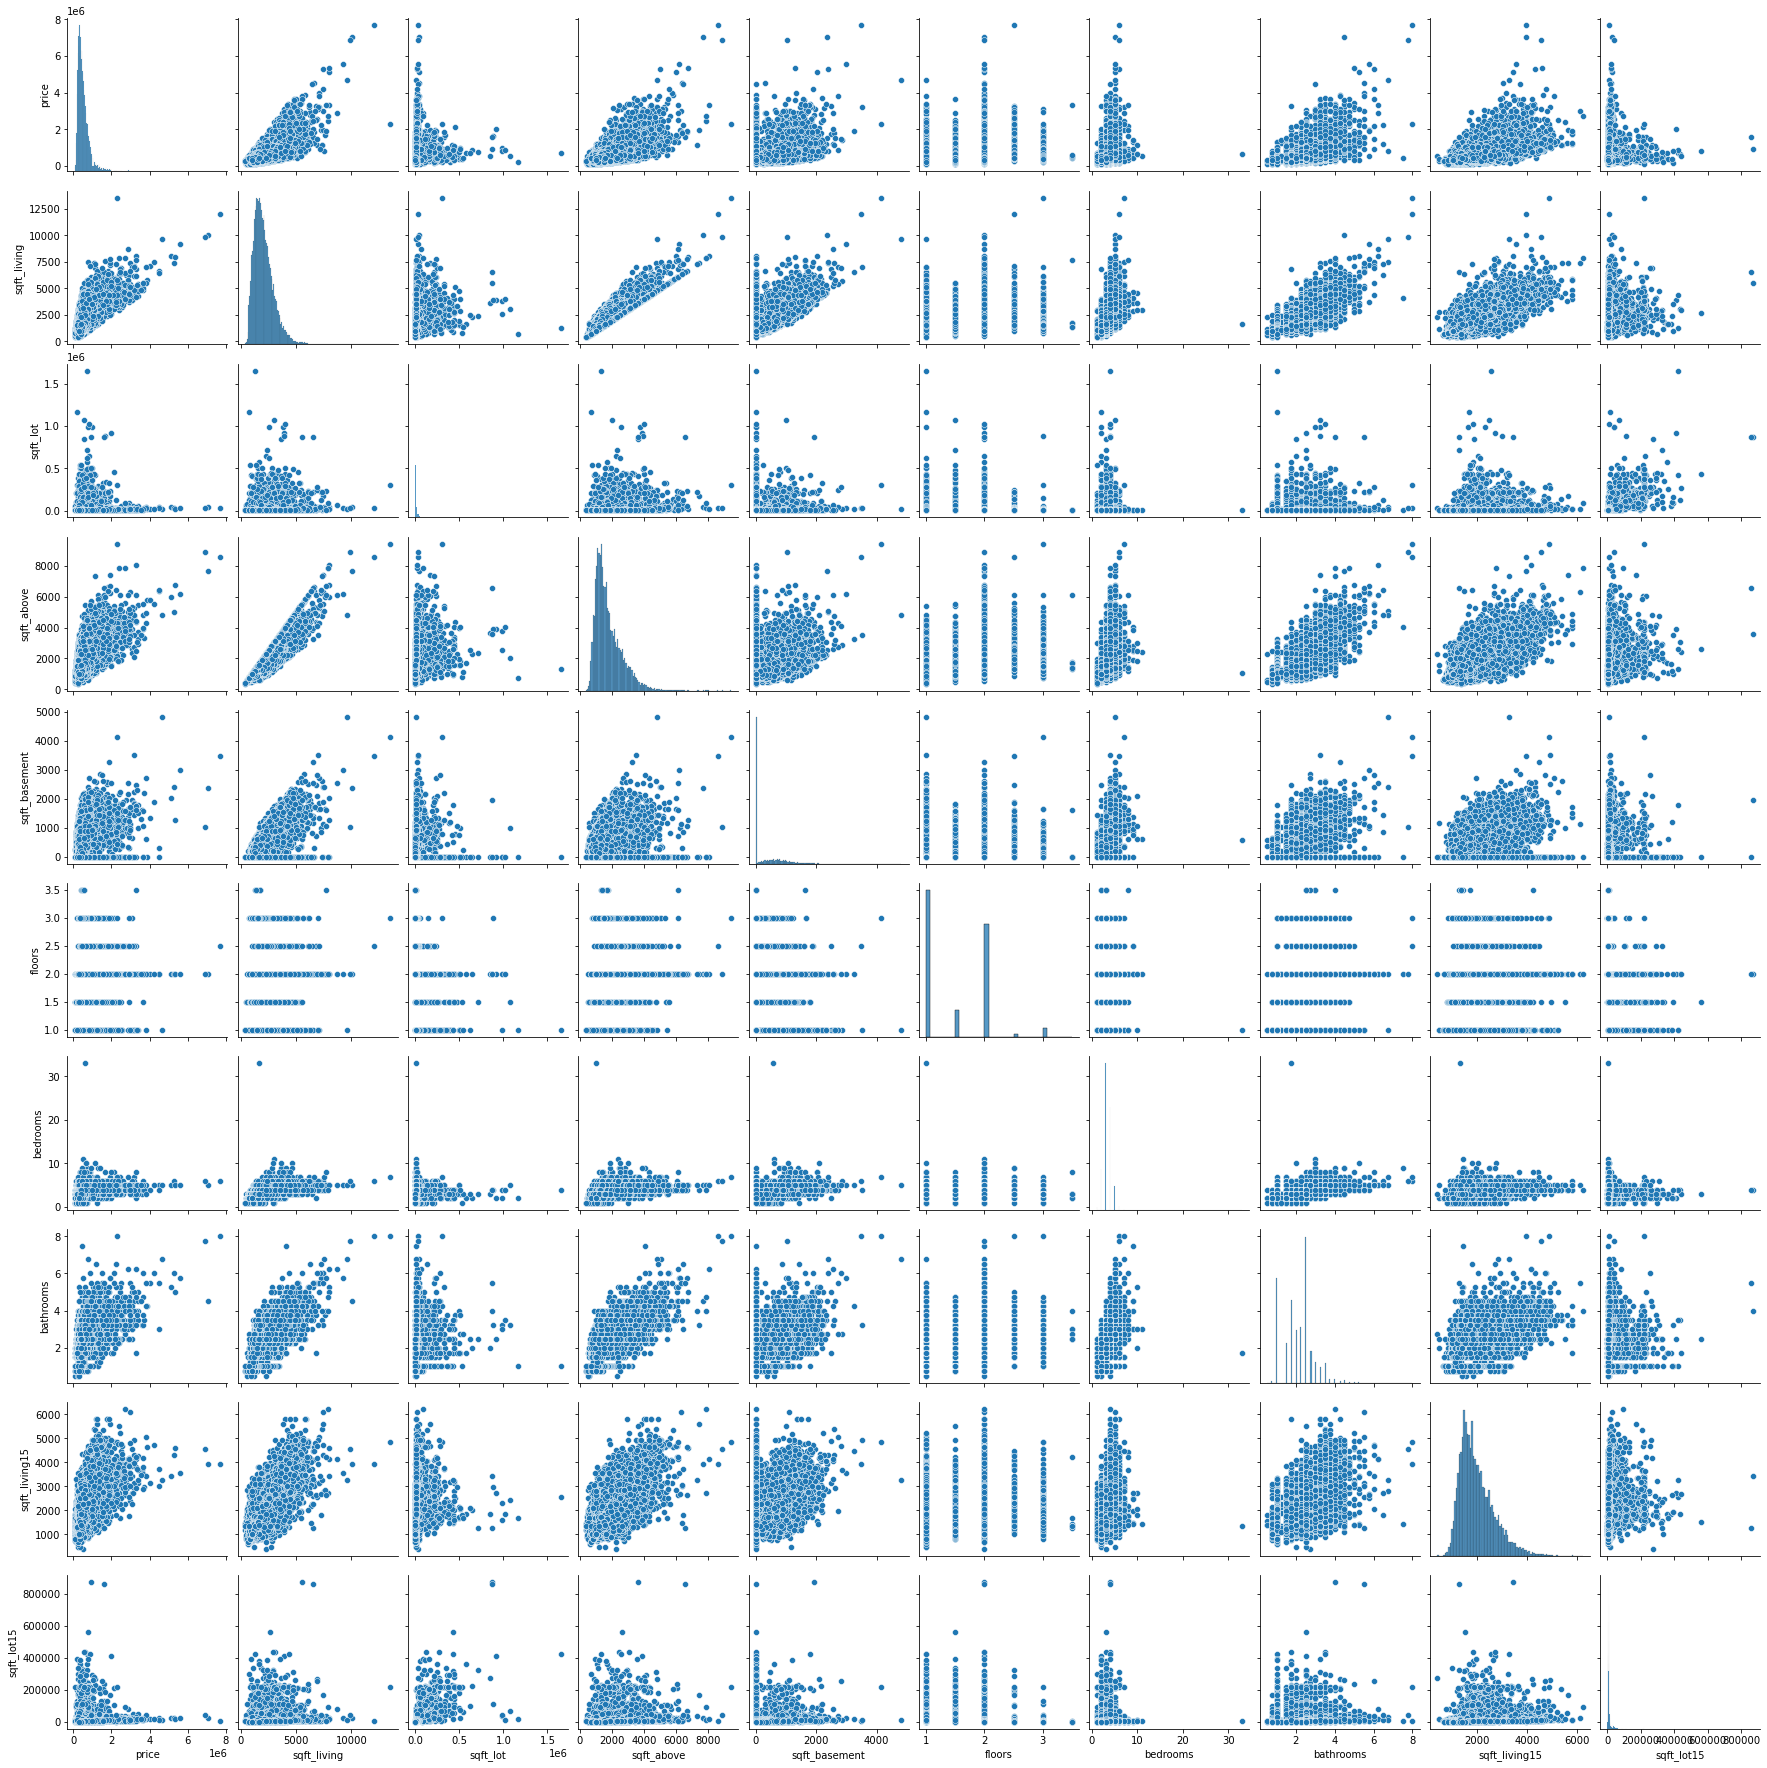

In [50]:
sns.pairplot(datan)

In [51]:
datan.corr()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,floors,bedrooms,bathrooms,sqft_living15,sqft_lot15
price,1.000000,0.701917,0.089876,0.605368,0.325008,0.256804,0.308787,0.525906,0.585241,0.082845
sqft_living,0.701917,1.000000,0.173453,0.876448,0.434576,0.353953,0.578212,0.755758,0.756402,0.184342
sqft_lot,0.089876,0.173453,1.000000,0.184139,0.015533,-0.004814,0.032471,0.088373,0.144763,0.718204
sqft_above,0.605368,0.876448,0.184139,1.000000,-0.052293,0.523989,0.479386,0.686668,0.731767,0.195077
sqft_basement,0.325008,0.434576,0.015533,-0.052293,1.000000,-0.245144,0.302683,0.282693,0.201579,0.016660
floors,0.256804,0.353953,-0.004814,0.523989,-0.245144,1.000000,0.177944,0.502582,0.280102,-0.010722
bedrooms,0.308787,0.578212,0.032471,0.479386,0.302683,0.177944,1.000000,0.514508,0.393406,0.030690
bathrooms,0.525906,0.755758,0.088373,0.686668,0.282693,0.502582,0.514508,1.000000,0.569884,0.088303
sqft_living15,0.585241,0.756402,0.144763,0.731767,0.201579,0.280102,0.393406,0.569884,1.000000,0.183515
sqft_lot15,0.082845,0.184342,0.718204,0.195077,0.016660,-0.010722,0.030690,0.088303,0.183515,1.000000


In [52]:
datanlog = pd.DataFrame()
for col in rel_cols:
    datanlog[f'{col}_log'] = datan[col].map(lambda x: np.log(x))

<ipython-input-52-12c9f6e45381>:3: RuntimeWarning: divide by zero encountered in log
  datanlog[f'{col}_log'] = datan[col].map(lambda x: np.log(x))


In [53]:
datanlog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price_log          21597 non-null  float64
 1   sqft_living_log    21597 non-null  float64
 2   sqft_lot_log       21597 non-null  float64
 3   sqft_above_log     21597 non-null  float64
 4   sqft_basement_log  21143 non-null  float64
 5   floors_log         21597 non-null  float64
 6   bedrooms_log       21597 non-null  float64
 7   bathrooms_log      21597 non-null  float64
 8   sqft_living15_log  21597 non-null  float64
 9   sqft_lot15_log     21597 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB


In [55]:
datanlog.corr()

,price_log,sqft_living_log,sqft_lot_log,sqft_above_log,sqft_basement_log,floors_log,bedrooms_log,bathrooms_log,sqft_living15_log,sqft_lot15_log
price_log,1.000000,0.674802,0.138261,0.586013,0.329013,0.322991,0.342850,0.520278,0.607154,0.123710
sqft_living_log,0.674802,1.000000,0.325983,0.864979,0.695312,0.393568,0.648121,0.760764,0.746836,0.303058
sqft_lot_log,0.138261,0.325983,1.000000,0.318663,0.397320,-0.211802,0.195969,0.084877,0.363743,0.918665
sqft_above_log,0.586013,0.864979,0.318663,1.000000,0.328873,0.578054,0.546713,0.683889,0.713102,0.298696
sqft_basement_log,0.329013,0.695312,0.397320,0.328873,1.000000,-0.172195,0.454156,0.371808,0.422185,0.382668
floors_log,0.322991,0.393568,-0.211802,0.578054,-0.172195,1.000000,0.213203,0.510644,0.300459,-0.203229
bedrooms_log,0.342850,0.648121,0.195969,0.546713,0.454156,0.213203,1.000000,0.534008,0.425690,0.175649
bathrooms_log,0.520278,0.760764,0.084877,0.683889,0.371808,0.510644,0.534008,1.000000,0.570469,0.079120
sqft_living15_log,0.607154,0.746836,0.363743,0.713102,0.422185,0.300459,0.425690,0.570469,1.000000,0.373618
sqft_lot15_log,0.123710,0.303058,0.918665,0.298696,0.382668,-0.203229,0.175649,0.079120,0.373618,1.000000


ValueError: autodetected range of [-inf, 8.480529207044645] is not finite

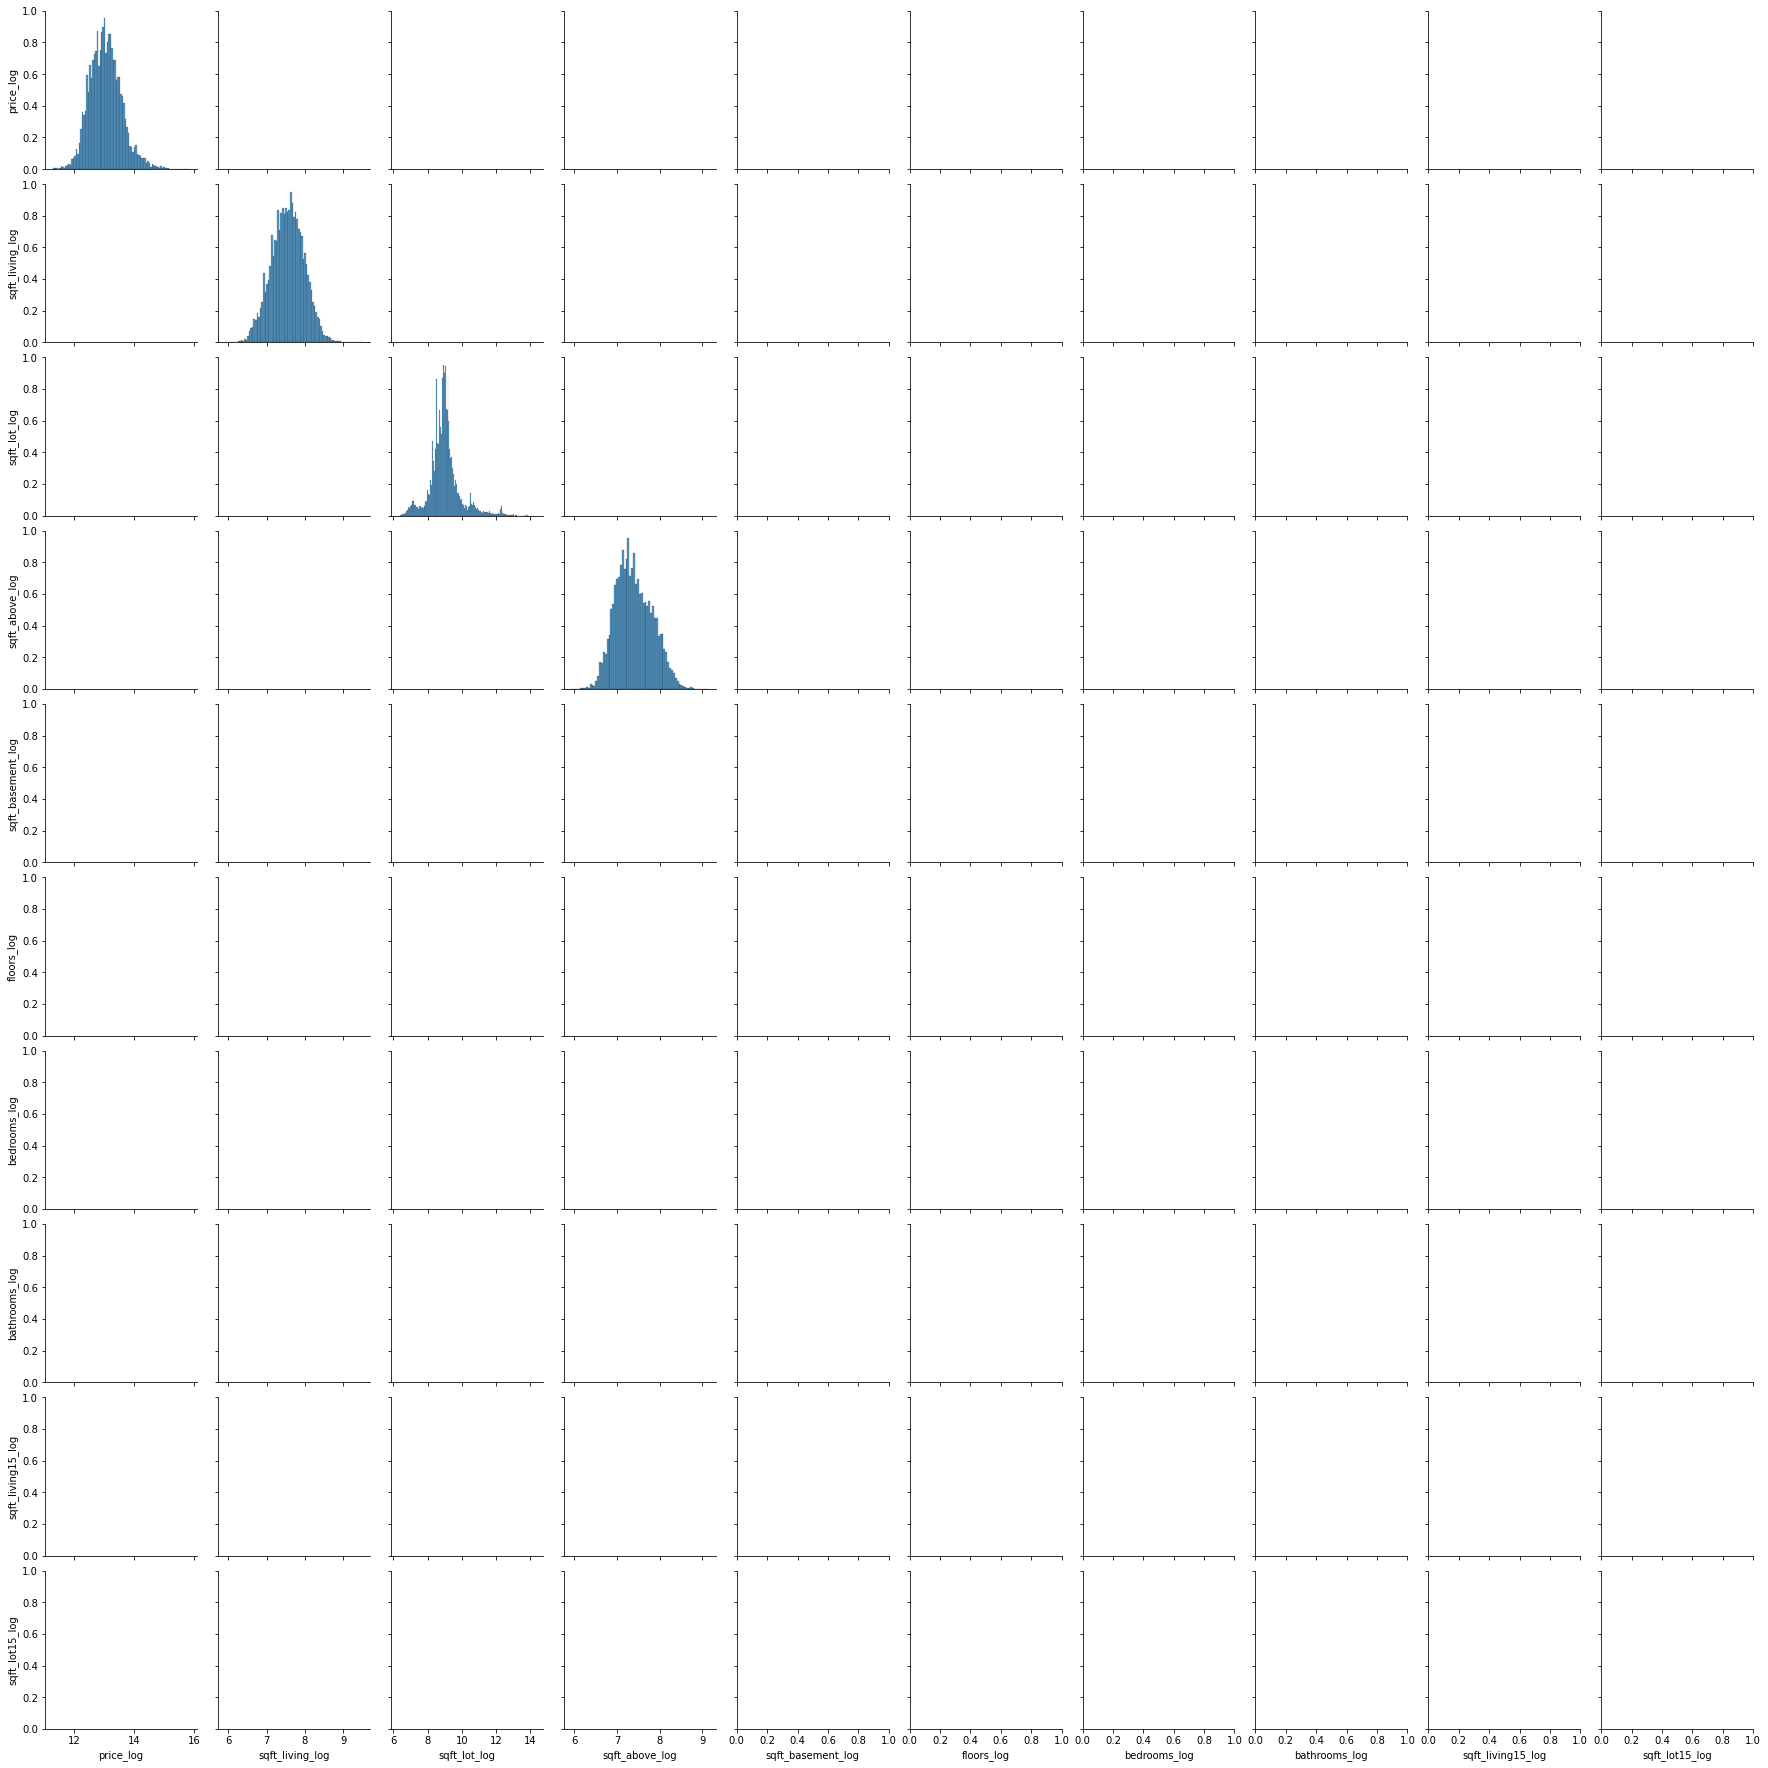

In [54]:
sns.pairplot(datanlog)

## Data Preparation

Describe and justify the process for preparing the data for analysis.

Questions to consider:

- Were there variables you dropped or created?
- How did you address missing values or outliers?
- Why are these choices appropriate given the data and the business problem?

In [ ]:
# code here to prepare your data

## Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How did you analyze the data to arrive at an initial approach?
- How did you iterate on your initial approach to make it better?
- Why are these choices appropriate given the data and the business problem?

## Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?

### Baseline Understanding

- What does a baseline, model-less prediction look like?

In [ ]:
# code here to arrive at a baseline prediction

### First $&(@# Model

Before going too far down the data preparation rabbit hole, be sure to check your work against a first 'substandard' model! What is the easiest way for you to find out how hard your problem is?

In [ ]:
# code here for your first 'substandard' model

In [ ]:
# code here to evaluate your first 'substandard' model

### Modeling Iterations

Now you can start to use the results of your first model to iterate - there are many options!

In [ ]:
# code here to iteratively improve your models

In [ ]:
# code here to evaluate your iterations

### 'Final' Model

In the end, you'll arrive at a 'final' model - aka the one you'll use to make your recommendations/conclusions. This likely blends any group work. It might not be the one with the highest scores, but instead might be considered 'final' or 'best' for other reasons.

In [ ]:
# code here to show your final model

In [ ]:
# code here to evaluate your final model

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?
